In [1]:
import matplotlib.pyplot as plt
%matplotlib widget
from utils.demo import BboxPromptDemo
import numpy as np
import cv2

# Remake predictor example

In [2]:
from utils.modelUtils import load_medsam
from classes.MedSAMClass import MedSAMWrapper, MedSAMInferer

import utils.promptUtils as prUt
import utils.analysisUtils as anUt
from utils.imageUtils import read_im_gt

# Obtain model, image, gt
device = 'cuda'
medsam_checkpoint_path = '/home/t722s/Desktop/UniversalModels/TrainedModels/medsam_vit_b.pth'

medsam_model = load_medsam(medsam_checkpoint_path)
medsam_wrapper = MedSAMWrapper(medsam_model, device)
predicter = MedSAMInferer(medsam_wrapper, device)

Button(description='clear', style=ButtonStyle())

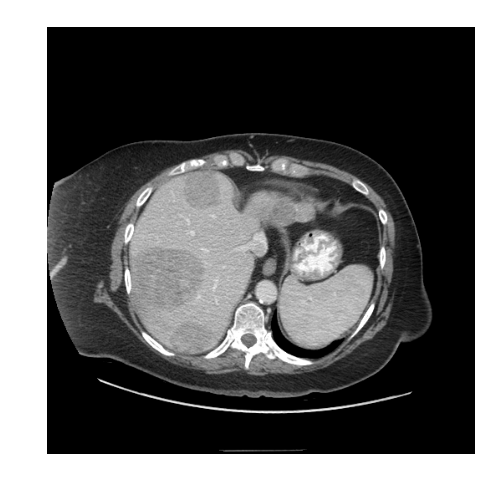

Button(description='save', style=ButtonStyle())

In [3]:
# abdomen CT
img = "/home/t722s/Desktop/UniversalModels/OtherRepos/MedSAM/assets/img_demo.png"
bbox_prompt_demo = BboxPromptDemo(medsam_model)
bbox_prompt_demo.show(img)

In [14]:
img_array = cv2.imread(img)
image = img_array[:,:,0]
image_3d = np.zeros((128, image.shape[0], image.shape[1]))
image_3d[0] = image

In [15]:
import importlib
import classes.MedSAMClass as c
importlib.reload(c)
predicter = c.MedSAMInferer(medsam_wrapper, device)

from utils.base_classes import Boxes2d
prompt = Boxes2d({0:bbox_prompt_demo.bbox})

segmentation = predicter.predict(image_3d, prompt)

Performing inference on slices: 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]


In [16]:
my_seg  = segmentation[0]

In [22]:
old_seg = bbox_prompt_demo.segs[1]

In [23]:
(my_seg != old_seg).sum()

1

In [19]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image, cmap = 'gray')
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [20]:
s = segmentation[0]

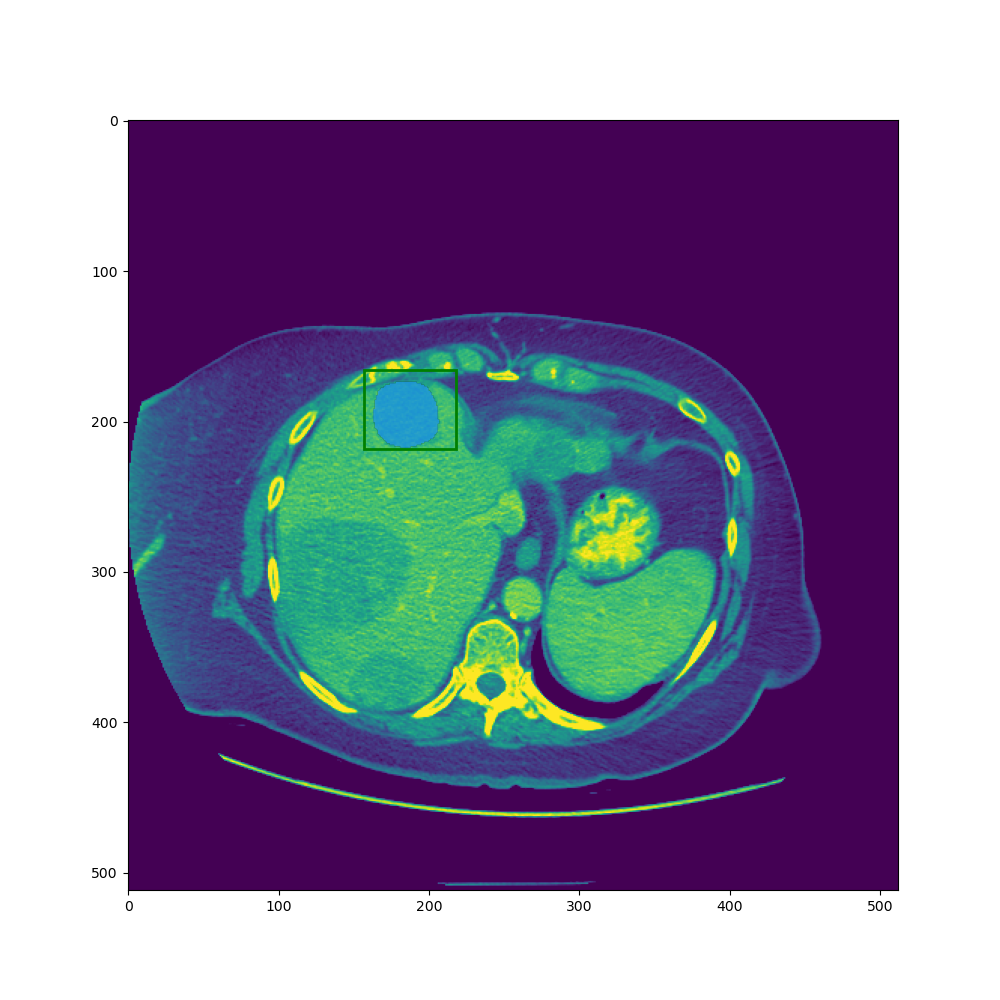

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_box(bbox_prompt_demo.bbox, plt.gca())
plt.axis('on')
show_mask(s, plt.gca())
plt.show()  
